In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [37]:
data = pd.read_csv("../Data/heart.csv")
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

# проверка на пустые данные

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Вывод

пропуски не обнаружены

# Выявить выбросы

In [39]:
hq_v = 0.75
lq_v = 0.25

data.quantile([lq_v, hq_v])

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
0.25  47.5  0.0  0.0   120.0  211.0  0.0      0.0     133.5   0.0      0.0   
0.75  61.0  1.0  2.0   140.0  274.5  0.0      1.0     166.0   1.0      1.6   

      slp  caa  thall  output  
0.25  1.0  0.0    2.0     0.0  
0.75  2.0  1.0    3.0     1.0

In [40]:
data.shape

(303, 14)

In [41]:
data_c = data.copy()

for col in data:
    if col in ["sex", "fbs", "restecg", "exng", "caa", "output"]:
        print("исключаем категорию ", col)
        continue
        pass
    lq = data[col].quantile(lq_v)
    hq = data[col].quantile(hq_v)
    iqr = hq - lq
    lower_limit = lq - 1.5 * iqr
    upper_limit = hq + 1.5 * iqr
    df_filtered = data[(data >= lower_limit) & (data <= upper_limit)].index
    if len(df_filtered.values):
        print("обнаружены выбросы в ", col)
        pass
    data_c = data_c[(np.abs(stats.zscore(data_c)) < 3).all(axis=1)]
    pass

обнаружены выбросы в  age
исключаем категорию  sex
обнаружены выбросы в  cp
обнаружены выбросы в  trtbps
обнаружены выбросы в  chol
исключаем категорию  fbs
исключаем категорию  restecg
обнаружены выбросы в  thalachh
исключаем категорию  exng
обнаружены выбросы в  oldpeak
обнаружены выбросы в  slp
исключаем категорию  caa
обнаружены выбросы в  thall
исключаем категорию  output


In [42]:
data_c.shape

(283, 14)

# Удалено

In [43]:
data.shape[0] - data_c.shape[0]

20

In [44]:
data_c.quantile([lq_v, hq_v])

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
0.25  47.0  0.0  0.0   120.0  211.0  0.0      0.0     133.5   0.0      0.0   
0.75  61.0  1.0  2.0   140.0  273.0  0.0      1.0     166.5   1.0      1.6   

      slp  caa  thall  output  
0.25  1.0  0.0    2.0     0.0  
0.75  2.0  1.0    3.0     1.0

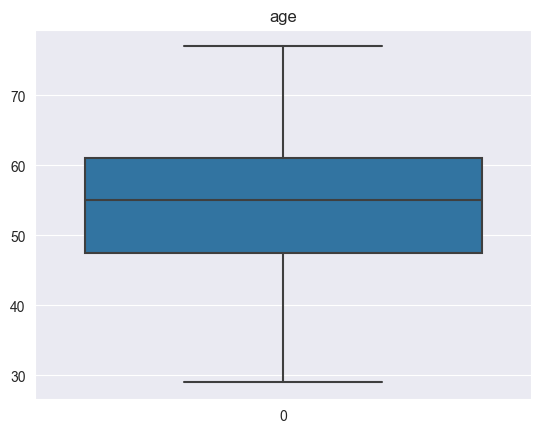

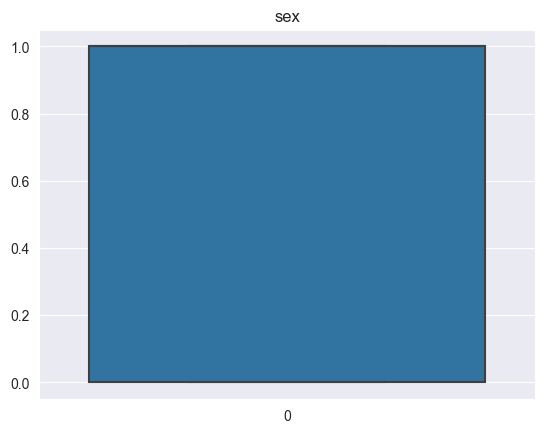

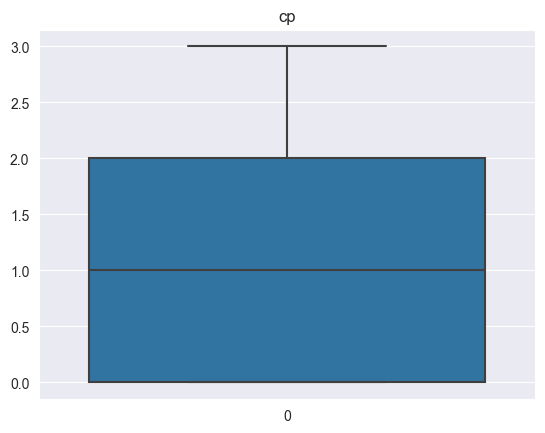

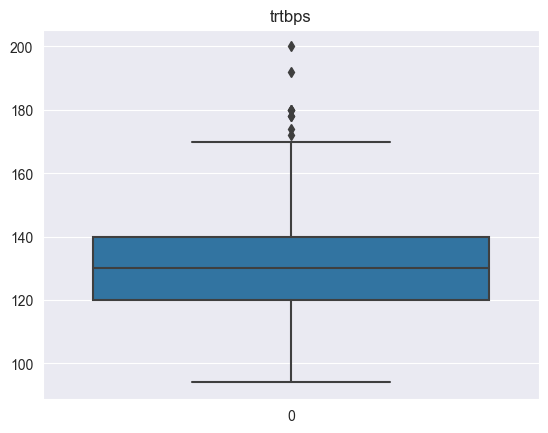

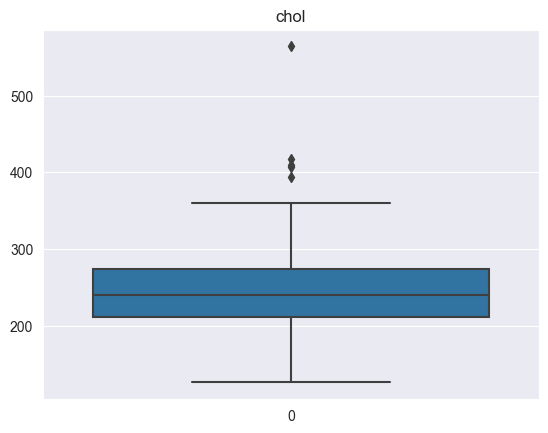

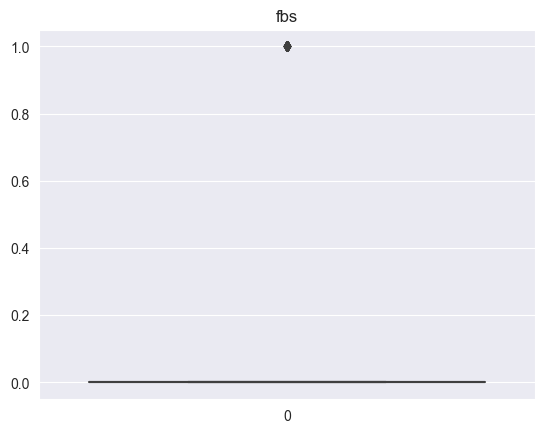

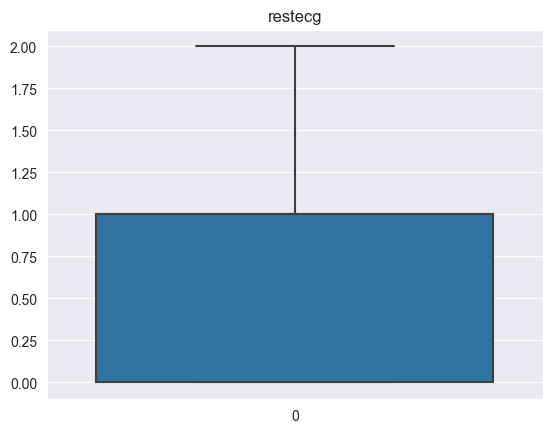

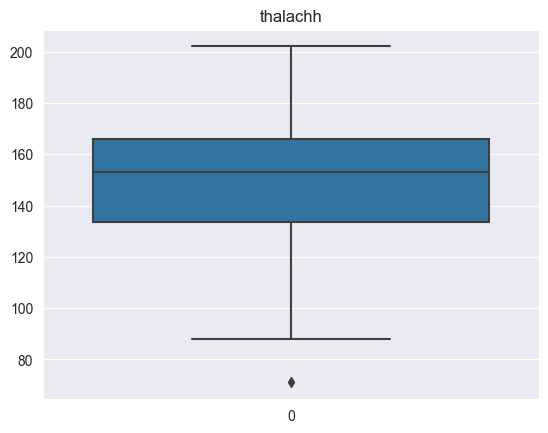

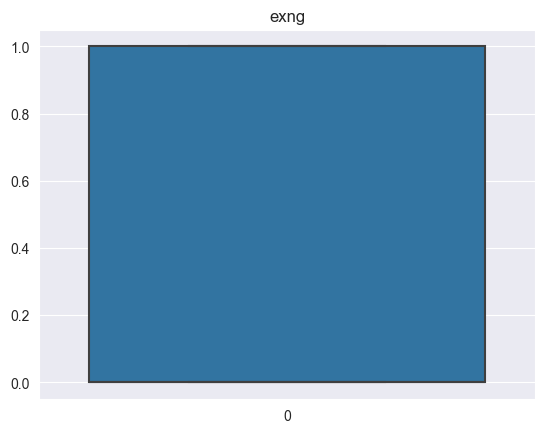

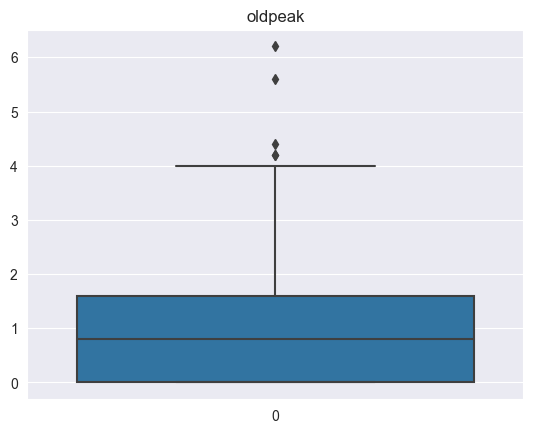

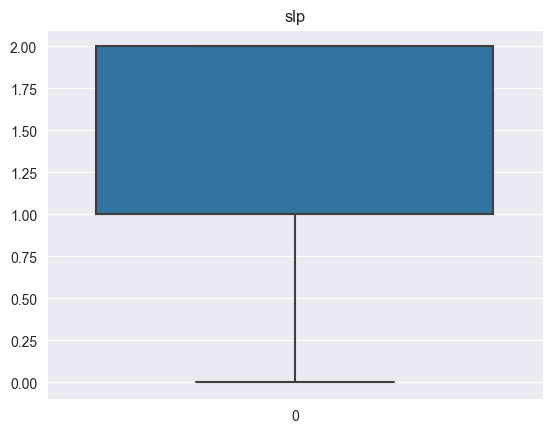

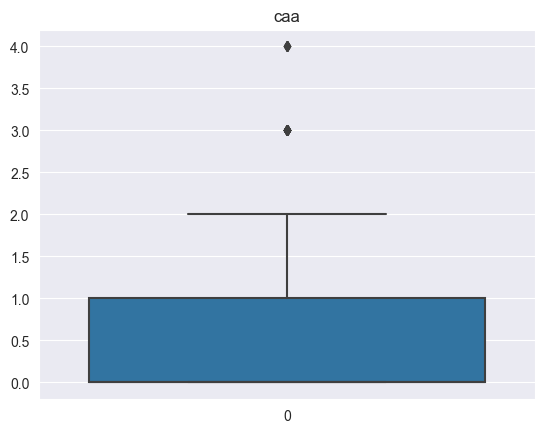

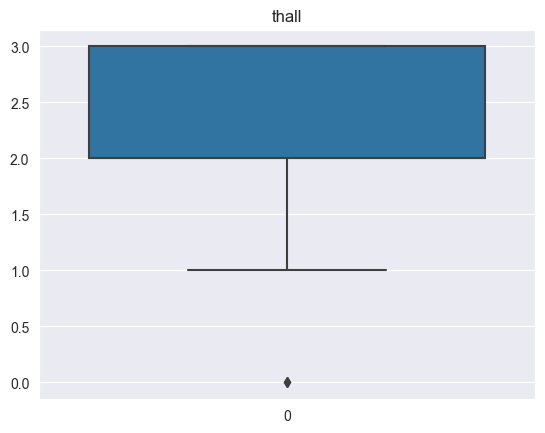

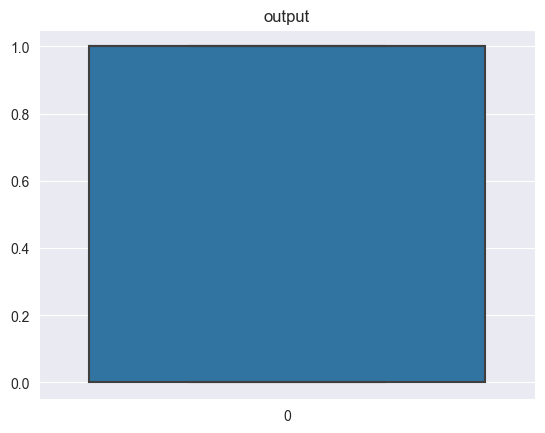

In [45]:
for col in data_c:
    plt.subplots(1)
    sns.boxplot(data=data[col])
    plt.title(col)
    pass

In [46]:
data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

# вывод

Выбросы выявленны и удалены